# Helper notebook for representative population sampling


A helper notebook for 
- experimenting with different methods before implementing them do simulate_population.py
- creating graphs and plots for better understanding the underlying distributions and help to tune them
- experiment with pretty much anything else with regards to population sim


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from population_meta_data import Constants
from simulate_population import PopulationSampleGenerator
from scipy.stats import lognorm

colors = ["#A42820", "#5F5647", "#9B110E", "#3F5151", "#4E2A1E", "#550307", "#0C1707"]

## Create graphs for obsidian notes

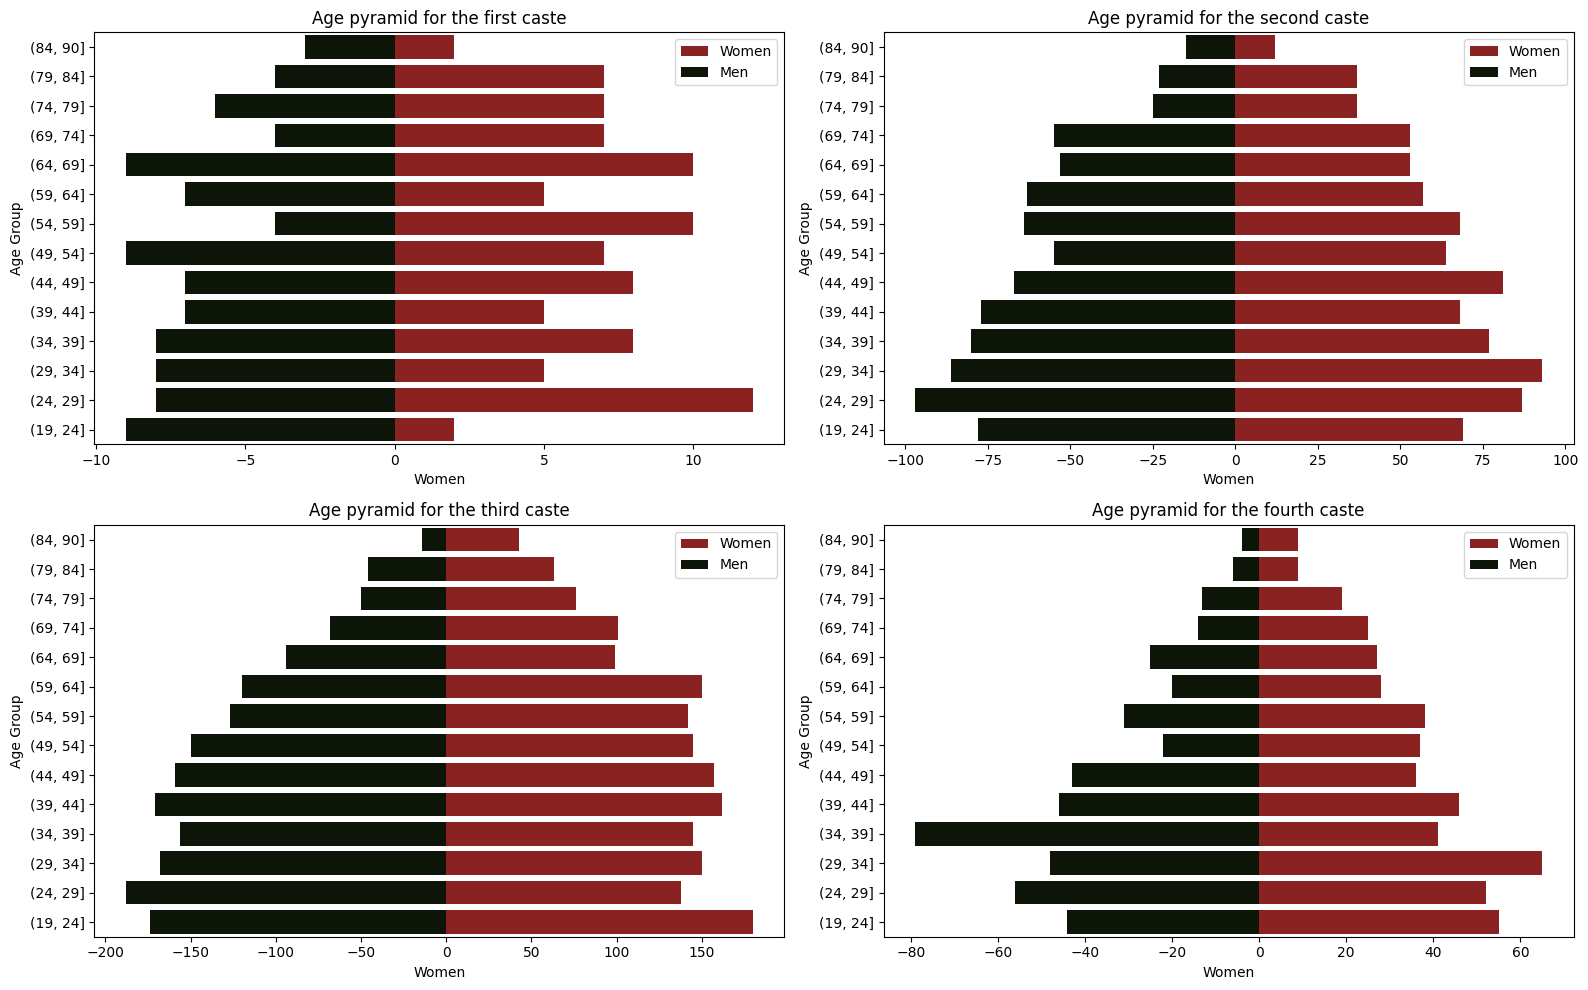

In [2]:
#graph age pyramids
sim1 = PopulationSampleGenerator('1st')
sim2 = PopulationSampleGenerator('2nd')
sim3 = PopulationSampleGenerator('3rd')
sim4 = PopulationSampleGenerator('4th')

df1 = sim1.simulateIncome()
df2 = sim2.simulateIncome()
df3 = sim3.simulateIncome()
df4 = sim4.simulateIncome()

def pyramid(df):
    df['Age Group'] = pd.cut(df['age'], Constants.CONSTANTS['cast']['1st']['women_age_bins'])

    age_pyramid = (
        df
        .groupby(['Age Group', 'sex'], observed=True)
        .size()
        .reset_index(name='count')
    )
    pyramid = age_pyramid.pivot(index='Age Group', columns='sex', values='count').fillna(0)
    pyramid.columns = ['Women', 'Men']
    pyramid['Men'] = -pyramid['Men']
    pyramid = pyramid.iloc[::-1, ::-1]
    return pyramid

figure, ax = plt.subplots(2, 2, figsize=(16, 10))
ax = ax.flatten()
df_list = [df1, df2, df3, df4]
titles = ["Age pyramid for the first caste", "Age pyramid for the second caste", "Age pyramid for the third caste", "Age pyramid for the fourth caste"]

for i, df in enumerate(df_list):
    sns.barplot(
        x='Women', y=pyramid(df).index,
          data=pyramid(df).reset_index(),
            color=colors[2], label='Women',
              order = pyramid(df).index, ax=ax[i]
    )
    sns.barplot(
        x='Men', y=pyramid(df).index,
          data=pyramid(df).reset_index(),
            color=colors[6], label='Men',
              order = pyramid(df).index, ax=ax[i]
    )
    ax[i].set_title(titles[i])

plt.tight_layout()



Text(0.5, 1.0, 'Distribution of income for the fourth cast')

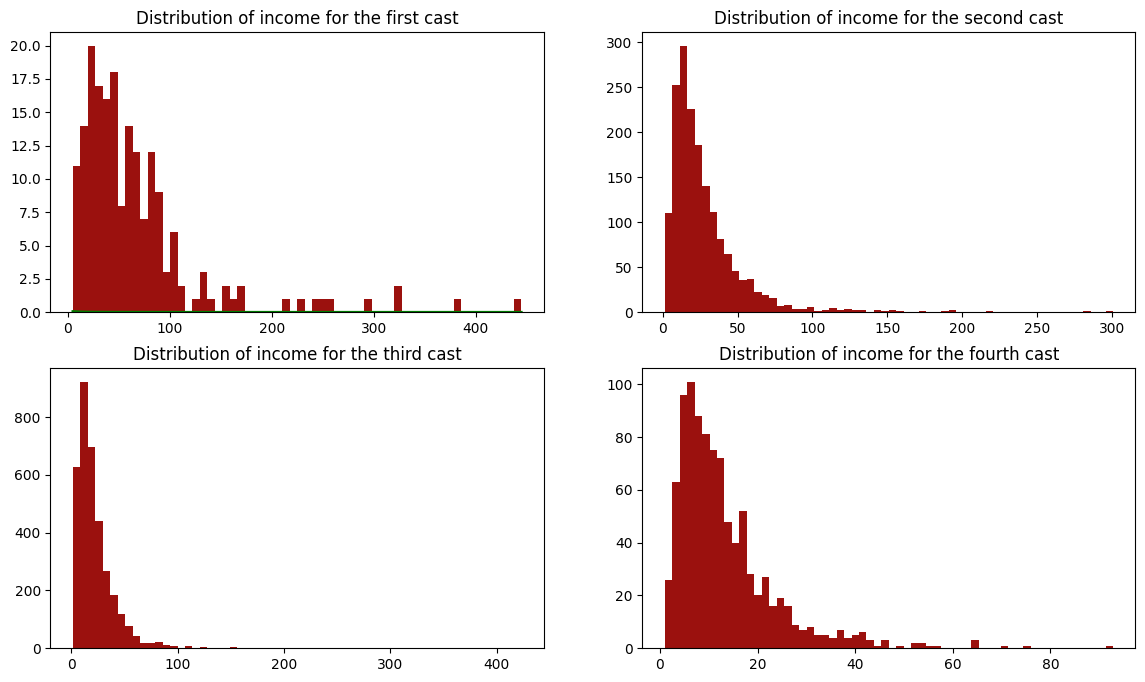

In [19]:
#plot income distribution
sim1 = PopulationSampleGenerator('1st')
sim2 = PopulationSampleGenerator('2nd')
sim3 = PopulationSampleGenerator('3rd')
sim4 = PopulationSampleGenerator('4th')


df1 = sim1.simulateIncome()
df2 = sim2.simulateIncome()
df3 = sim3.simulateIncome()
df4 = sim4.simulateIncome()

income1 = (df1['income']/1000).to_list()
income2 = (df2['income']/1000).to_list()
income3 = (df3['income']/1000).to_list()
income4 = (df4['income']/1000).to_list()   

figure, ax = plt.subplots(2, 2, figsize=(14, 8))
sigma, mu = 1.0756001862584008, 10.6
x = np.linspace(min(income1), max(income1), 500)
pdf = lognorm.pdf(x, s=sigma, scale=mu)


ax[0, 0].hist(income1, bins=60, color=colors[2])
ax[0, 0].plot(x, pdf, 'green', lw=2, label='Lognormal Distribution')
ax[0, 0].set_title('Distribution of income for the first cast')

ax[0, 1].hist(income2, bins=60, color=colors[2])
ax[0, 1].set_title('Distribution of income for the second cast')

ax[1, 0].hist(income3, bins=60, color=colors[2])
ax[1, 0].set_title('Distribution of income for the third cast')

ax[1, 1].hist(income4, bins=60, color=colors[2])
ax[1, 1].set_title('Distribution of income for the fourth cast')


Text(0.5, 1.0, 'Age vs income for the fourth cast')

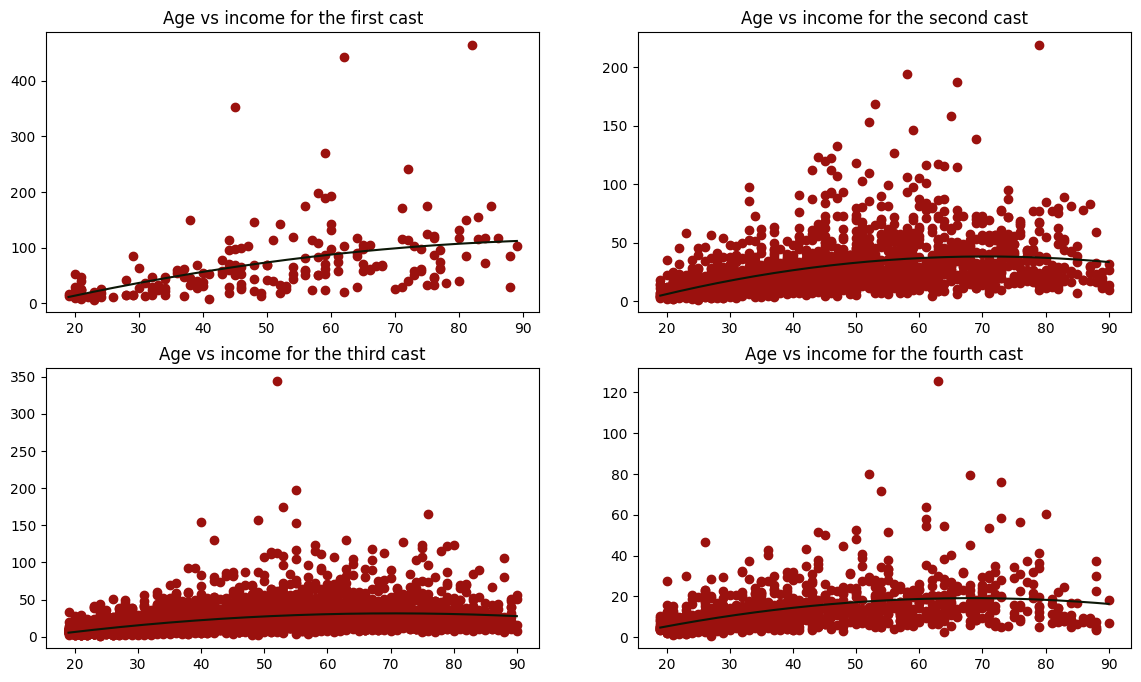

In [4]:
#plot age vs income to see the quadratic curve which is used to determine the mu value for each age when sampling the lognorm dist.
sim1 = PopulationSampleGenerator('1st')
sim2 = PopulationSampleGenerator('2nd')
sim3 = PopulationSampleGenerator('3rd')
sim4 = PopulationSampleGenerator('4th')


df1 = sim1.simulateIncome()
df2 = sim2.simulateIncome()
df3 = sim3.simulateIncome()
df4 = sim4.simulateIncome()

df1 = df1.sort_values(by=['age'])
x1, y1 = df1['age'].to_list(), (df1['income']/1000).to_list()
df2 = df2.sort_values(by=['age'])
x2, y2 = df2['age'].to_list(), (df2['income']/1000).to_list()
df3 = df3.sort_values(by=['age'])
x3, y3 = df3['age'].to_list(), (df3['income']/1000).to_list()
df4 = df4.sort_values(by=['age'])
x4, y4 = df4['age'].to_list(), (df4['income']/1000).to_list()


figure, ax = plt.subplots(2, 2, figsize=(14, 8))


z1 = np.polyfit(x1, y1, 2)
p1 = np.poly1d(z1)
ax[0, 0].scatter(x1, y1, color=colors[2])
ax[0, 0].plot(x1, p1(x1), color=colors[6])
ax[0, 0].set_title('Age vs income for the first cast')

z2 = np.polyfit(x2, y2, 2)
p2 = np.poly1d(z2)
ax[0, 1].scatter(x2, y2, color=colors[2])
ax[0, 1].plot(x2, p2(x2), color=colors[6])
ax[0, 1].set_title('Age vs income for the second cast')


z3 = np.polyfit(x3, y3, 2)
p3 = np.poly1d(z3)
ax[1, 0].scatter(x3, y3, color=colors[2])
ax[1, 0].plot(x3, p3(x3), color=colors[6])
ax[1, 0].set_title('Age vs income for the third cast')


z4 = np.polyfit(x4, y4, 2)
p4 = np.poly1d(z4)
ax[1, 1].scatter(x4, y4, color=colors[2])
ax[1, 1].plot(x4, p4(x4), color=colors[6])
ax[1, 1].set_title('Age vs income for the fourth cast')

## Simulate education

In [9]:
from population_meta_data import Constants
from simulate_population import PopulationSampleGenerator
import pandas as pd
casts = ['1st', '2nd', '3rd', '4th']
sim1, sim2, sim3, sim4 = PopulationSampleGenerator('1st'), PopulationSampleGenerator('2nd'), PopulationSampleGenerator('3rd'), PopulationSampleGenerator('4th')
df1, df2, df3, df4 = sim1.createSample(), sim2.createSample(), sim3.createSample(), sim4.createSample()
df1['cast'], df2['cast'], df3['cast'], df4['cast'] = casts[0], casts[1], casts[2], casts[3] 
population_sample = pd.concat([df1, df2, df3, df4], ignore_index=True)
population_sample = population_sample.sample(frac=1)

In [10]:
population_sample.head(10)

,idx,age,sex,income,education,cast
417,228,26,0,7040.094203,4,2nd
2480,585,77,0,9798.618366,5,3rd
4988,3093,30,1,22990.537823,4,3rd
5071,3176,29,1,5181.113998,4,3rd
4643,2748,36,1,24119.897107,5,3rd
2107,212,40,0,30698.836568,4,3rd
1546,1357,41,1,14833.986541,4,2nd
6213,842,37,1,5202.236353,1,4th
4670,2775,20,1,22014.832001,5,3rd
1015,826,22,0,4215.200213,5,2nd


In [11]:
population_sample.describe()

,idx,age,sex,income,education
count,6319.000000,6319.000000,6319.000000,6319.000000,6319.000000
mean,1259.781453,47.102231,0.490267,23937.850259,3.368254
std,966.719031,17.836308,0.499945,23764.160427,1.269861
min,0.000000,19.000000,0.000000,1413.842310,1.000000
25%,463.000000,32.000000,0.000000,9881.309301,3.000000
50%,1011.000000,45.000000,0.000000,17021.429404,4.000000
75%,1895.500000,61.000000,1.000000,29894.783844,4.000000
max,3475.000000,90.000000,1.000000,393455.268492,5.000000
